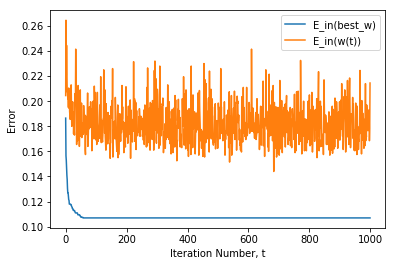

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def test_h(w, x):
    return np.sign(w @ x)

#set dimension to 2, sample size to 20, range to [-10, 10]
num_dimensions = 2
num_samples = 1100
num_testing = 1000
num_training = 100
training_range = 40

#create training set x
x_sample = np.zeros((num_dimensions+1,num_samples))
x_sample[0] = np.ones(num_samples)
for i in range(1, num_dimensions + 1):
    l = np.random.uniform(-training_range, training_range, num_samples)
    x_sample[i] = l

#create target and initial norm of the decision boundary
w_target = np.array([0, 0, 1])
w_initial = np.array([5, 10, 3])

x_testing = np.zeros((num_dimensions+1,num_testing))
x_testing[0] = np.ones(num_testing)
x_training = np.zeros((num_dimensions+1,num_training))
x_training[0] = np.ones(num_training)
for i in range(1, num_dimensions+1):
    l = x_sample[i][0:num_testing]
    x_testing[i] = l
    k = x_sample[i][num_testing:num_samples]
    x_training[i] = k
#print(x_testing)
#print(x_training)
#create training set y
y_sample = test_h(w_target, x_sample)

#make the dataset non-linearly separable by flipping the labels of N/10 randomly selected y_n's.
flip_list = random.sample(range(num_samples),int(num_samples/10))
for i in flip_list:
    y_sample[i] = -1 * y_sample[i]

y_testing = y_sample[0:num_testing]
y_training = y_sample[num_testing:num_samples]
#plot points on the graph. If y > 0, the point is red. Otherwise, the point is blue
x_coordinates = x_training[1, :]
y_coordinates = x_training[2, :]
colors = ["r" if y > 0 else "b" for y in y_training]
#plt.scatter(x_coordinates, y_coordinates, c = colors)

#pocket learning algorithm
max_iteration = 1000

#return the number of misclassified points
def mis(w, x, y):
    missList = []
    s = np.sign(w@x)
    for i in range(len(y)):
        if (s[i]!=y[i]):
            missList.append(i)
    return missList
            
def pocket_algo(w_initial, x_training, y_training, x_testing, y_testing):
    misclassified = True
    iteration = 0
    E_inBest = []
    E_inEach = []
    E_outBest = []
    E_outEach = []
    best_w = w_initial
    misList = mis(w_initial, x_training, y_training)
    #calculate number of misclassifications in training and testing sets
    least_misses_training = len(misList)
    least_misses_testing = len(mis(w_initial, x_testing, y_testing))
    total_num_training = len(y_training)
    total_num_testing = len(y_testing)
    while iteration < max_iteration:
        i = random.choice(misList)
        update_w = best_w + y_training[i]*x_training[:,i]
        current_misses_training = len(mis(update_w, x_training, y_training))
        current_misses_testing = len(mis(update_w, x_testing, y_testing))
        #If new weight is better, update the best weight.
        if(current_misses_training<least_misses_training):
            best_w = update_w
            least_misses_training = len(mis(update_w, x_training, y_training))
            least_misses_testing = len(mis(update_w, x_testing, y_testing))
        #Calculate E_inBest, E_inEach, E_outBest, E_outEach
        E_inBest.append(least_misses_training/total_num_training)
        E_inEach.append(current_misses_training/total_num_training)
        E_outBest.append(least_misses_testing/total_num_testing)
        E_outEach.append(current_misses_testing/total_num_testing)

                
        iteration += 1
    return best_w, E_inBest, E_inEach, E_outBest, E_outEach
        

#Set number of experiment
experiment_num = 20
E_inBestTotal = [0]*max_iteration
E_inEachTotal = [0]*max_iteration
E_outBestTotal = [0]*max_iteration
E_outEachTotal = [0]*max_iteration
#Repeat experiments and calculate the average E_inBest, E_inEach, E_outBest, E_outEach
for exp in range(experiment_num):
    best_w, E_inBest, E_inEach, E_outBest, E_outEach = pocket_algo(w_initial, x_training, y_training, x_testing, y_testing)
    E_inBestTotal = np.add(E_inBestTotal, E_inBest)
    E_inEachTotal = np.add(E_inEachTotal, E_inEach)
    E_outBestTotal = np.add(E_outBestTotal, E_outBest)
    E_outEachTotal = np.add(E_outEachTotal, E_outEach)
E_inBestAve = np.divide(E_inBestTotal, experiment_num)
E_inEachAve = np.divide(E_inEachTotal, experiment_num)
E_outBestAve = np.divide(E_outBestTotal, experiment_num)
E_outEachAve = np.divide(E_outEachTotal, experiment_num)

f = plt.figure()
#Plot E_inBest and E_inEach over iterations
plt.plot(range(1000), E_inBestAve, label = 'E_in(best_w)')
plt.plot(range(1000), E_inEachAve, label = 'E_in(w(t))')


plt.xlabel('Iteration Number, t')
plt.ylabel('Error')
plt.legend()
plt.show()
f.savefig("E_in.pdf", bbox_inches='tight')

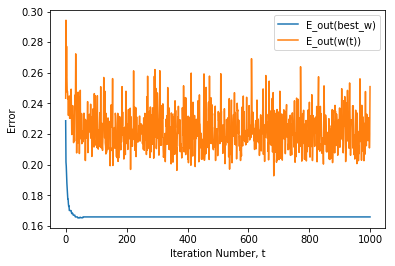

In [61]:
#Plot E_outBest and E_outEach over iterations.
g = plt.figure()
plt.plot(range(1000), E_outBestAve, label = 'E_out(best_w)')
plt.plot(range(1000), E_outEachAve, label = 'E_out(w(t))')
plt.xlabel('Iteration Number, t')
plt.ylabel('Error')
plt.legend()
plt.show()
g.savefig("E_out.pdf", bbox_inches='tight')